# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

/var/folders/90/nhqnhqyn07v1sx9mn64ln2kc0000gn/T/ipykernel_3548/1790343300.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
learning_rate = 0.1
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [4]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

2023-11-08 14:01:44.432391: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-08 14:01:44.432412: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-08 14:01:44.432416: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-08 14:01:44.432442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 14:01:44.432456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = tape.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
        print('step: {:4d}\tloss: {:4f}\tW: {:4f}\tb: {:4f}'.format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.311028	W: 1.810954	b: 0.129129
step:  100	loss: 1.311028	W: 1.811011	b: 0.129110
step:  150	loss: 1.311028	W: 1.811011	b: 0.129110
step:  200	loss: 1.311028	W: 1.811011	b: 0.129110
step:  250	loss: 1.311028	W: 1.811011	b: 0.129110
step:  300	loss: 1.311028	W: 1.811011	b: 0.129110
step:  350	loss: 1.311028	W: 1.811011	b: 0.129110
step:  400	loss: 1.311028	W: 1.811011	b: 0.129110
step:  450	loss: 1.311028	W: 1.811011	b: 0.129110
step:  500	loss: 1.311028	W: 1.811011	b: 0.129110
step:  550	loss: 1.311028	W: 1.811011	b: 0.129110
step:  600	loss: 1.311028	W: 1.811011	b: 0.129110
step:  650	loss: 1.311028	W: 1.811011	b: 0.129110
step:  700	loss: 1.311028	W: 1.811011	b: 0.129110
step:  750	loss: 1.311028	W: 1.811011	b: 0.129110
step:  800	loss: 1.311028	W: 1.811011	b: 0.129110
step:  850	loss: 1.311028	W: 1.811011	b: 0.129110
step:  900	loss: 1.311028	W: 1.811011	b: 0.129110
step:  950	loss: 1.311028	W: 1.811011	b: 0.129110
step: 1000	loss: 1.311028	W: 1.811011	b: 0.129110


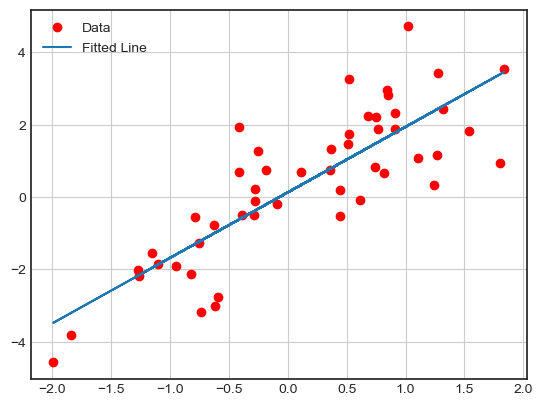

In [13]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
# plt.plot(X, pred, 'g^', label='pred')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [14]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [15]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [24]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [25]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

1.242123
1.3701998
1.401788


### 데이터 지정

In [35]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

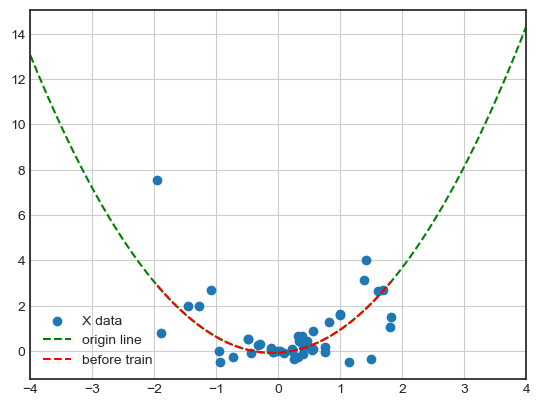

In [36]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [37]:
def compute_loss():
    pred_y = a*(np.array(X)**2) + b*np.array(X) + c
    loss = tf.reduce_mean((Y - pred_y)**2)
    return loss

### Optimizer

In [38]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [39]:
for epoch in range(1, epochs+1, 1):
    optimizer.minimize(compute_loss, var_list=[a, b, c])
    
    if epoch % 100 == 0:
        print('epoch: {:4d}\ta {:4f}\tb {:4f}\tc {:4f}\t'.format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a 0.894452	b -0.194707	c 0.061314	
epoch:  200	a 0.894249	b -0.196059	c 0.061703	
epoch:  300	a 0.894248	b -0.196058	c 0.061701	
epoch:  400	a 0.894248	b -0.196058	c 0.061701	
epoch:  500	a 0.894248	b -0.196058	c 0.061701	
epoch:  600	a 0.894248	b -0.196058	c 0.061701	
epoch:  700	a 0.894248	b -0.196058	c 0.061701	
epoch:  800	a 0.894248	b -0.196058	c 0.061701	
epoch:  900	a 0.894248	b -0.196058	c 0.061701	
epoch: 1000	a 0.894248	b -0.196058	c 0.061701	


### 학습 후의 회귀선

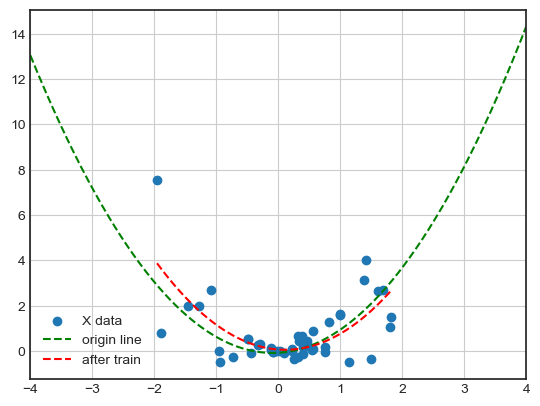

In [40]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [41]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [48]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [49]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])

X_train, X_test = X_train / 255., X_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸

In [50]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [51]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [61]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth=num_classes)
    pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)
    
    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_predict = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_predict, tf.float32))

### Optimizer

In [62]:
optimizer = tf.optimizers.SGD(learning_rate)

In [63]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
        
    gradients = tape.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [74]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step: {:4d}\tloss: {:4f}\taccuracy: {:4f}'.format(step, loss, acc))

step:   50	loss: 0.936047	accuracy: 0.808594
step:  100	loss: 0.612974	accuracy: 0.863281
step:  150	loss: 0.736704	accuracy: 0.816406
step:  200	loss: 0.803376	accuracy: 0.832031
step:  250	loss: 0.958365	accuracy: 0.804688
step:  300	loss: 0.750970	accuracy: 0.839844
step:  350	loss: 1.000856	accuracy: 0.800781
step:  400	loss: 1.001530	accuracy: 0.808594
step:  450	loss: 0.572193	accuracy: 0.839844
step:  500	loss: 0.509045	accuracy: 0.847656
step:  550	loss: 0.766578	accuracy: 0.824219
step:  600	loss: 0.621903	accuracy: 0.820312
step:  650	loss: 0.805772	accuracy: 0.816406
step:  700	loss: 0.682917	accuracy: 0.851562
step:  750	loss: 0.610893	accuracy: 0.871094
step:  800	loss: 0.879285	accuracy: 0.835938
step:  850	loss: 0.706737	accuracy: 0.835938
step:  900	loss: 0.645891	accuracy: 0.851562
step:  950	loss: 0.556914	accuracy: 0.871094
step: 1000	loss: 0.801848	accuracy: 0.816406


###  테스트

In [75]:
pred = logistic_regression(X_test)
print('Test Accuracy: {}'.format(accuracy(pred, Y_test)))

Test Accuracy: 0.8443999886512756


### 시각화

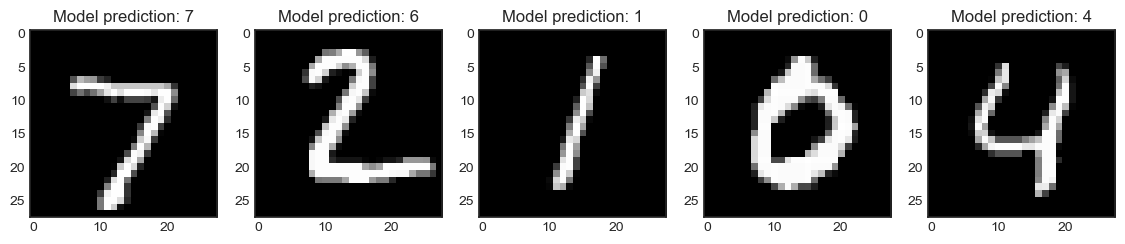

In [76]:
num_images = 5
test_images = X_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14, 8))
for i in range(1, num_images+1, 1):
    plt.subplot(1, num_images, i)
    plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
    plt.title('Model prediction: {}'.format(np.argmax(predictions.numpy()[i-1])))
    
plt.show()